In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# ÊòæÁ§∫ÂõæÂÉè
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# ÈöèÊú∫Âä†Ê§íÁõêÂáΩÊï∞
def salt(img,n):
    # Âæ™ÁéØÊ∑ªÂä†n‰∏™Ê§íÁõê
    for k in range(n):
        # ÈöèÊú∫Ê∑ªÂä†Ê§íÁõêÁöÑÂùêÊ†á
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # Ëã•‰ΩçÁÅ∞Â∫¶Âõæ
        img[i,j] = 255
        # Ëã•‰∏∫RGBÂõæ
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# Ê∏ÖÊ¥óÈîêÂåñÂõæÁâá
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [5]:
# ËæπÁºòÊ£ÄÊµãËÉΩÊ£ÄÊµãËæπÁºòÔºå‰ΩÜËæπÁºòÊòØ‰∏çËøûÁª≠ÁöÑÔºåÂõæÂÉèËΩÆÂªìÊòØÂÄºÂ∞ÜËæπÁºòËøûÊé•Ëµ∑Êù•ÂΩ¢ÊàêÁöÑ‰∏Ä‰∏™Êï¥‰Ωì
# cv2.findContours()ÔºöÊü•ÊâæÂõæÂÉèËΩÆÂªì‰ø°ÊÅØ
# cv2.drawContours()ÔºöËÉΩÂ∞ÜËΩÆÂªìÁªòÂà∂Âá∫Êù•

# 12.1 Êü•ÊâæÂπ∂ÁªòÂà∂ËΩÆÂªì

### 12.1.1 Êü•ÊâæËΩÆÂªìÔºöfindContoursÂáΩÊï∞

In [6]:
# image,contours,hierarchy = cv2.findContours(image,mode,method)
# imageÔºö‰∏éÂáΩÊï∞ÂèÇÊï∞‰∏≠ÁöÑimage‰∏ÄÊ†∑
# contoursÔºöËøîÂõûÁöÑËΩÆÂªì
# hierarchyÔºöÂõæÂÉèÁöÑÊãìÊâë‰ø°ÊÅØÔºàËΩÆÂªìÁöÑÂ±ÇÊ¨°Ôºâ
# imageÔºöÂéüÂßãÂõæÂÉè„ÄÇ8‰ΩçÂçïÈÄöÈÅìÂõæÂÉèÔºåÊâÄÊúâÈùû0ÂÄºË¢´Â§ÑÁêÜÊàê1Ôºå0‰∏çÂèòÔºå‰πüÂ∞±ÊòØËØ¥ÁÅ∞Â∫¶ÂõæÂÉè‰ºöË¢´Ëá™Âä®Â§ÑÁêÜÊàê‰∫åÂÄºÂõæ„ÄÇ
# ÂÆûÈôÖÊìç‰Ωú‰∏≠ÂèØÊ†πÊçÆÈúÄË¶ÅÔºåÈ¢ÑÂÖà‰ΩøÁî®ÈòàÂÄºÂ§ÑÁêÜÁ≠âÂáΩÊï∞Â∞ÜÂæÖÊü•ÊâæËΩÆÂªìÂõæÂÉèÂ§ÑÁêÜ‰∏∫‰∫åÂÄºÂõæ
# modeÔºöËΩÆÂªìÊ£ÄÁ¥¢Ê®°Âºè
# methodÔºöËΩÆÂªìÁöÑËøë‰ººÊñπÊ≥ï

# ËøîÂõûÂÄºimageÔºö
# ‰∏éÂèÇÊï∞‰∏ÄËá¥ÔºåÂ∞±ÊòØÂéüÂßãÂõæÂÉèÔºåÂú®opencv 4.X‰∏≠ÔºåËØ•ËøîÂõûÂÄºÂ∑≤ÁªèË¢´ÂèñÊ∂à
# contours,hierarchy = cv2.findContours(image,mode,method)

# ËøîÂõûÂÄºcontoursÔºö
# ÊòØ‰∏ÄÁªÑËΩÆÂªì‰ø°ÊÅØÔºåÊØè‰∏™ËΩÆÂªìÈÉΩÁî±Ëã•Âπ≤‰∏™ÁÇπÁªÑÊàê
# contoursÁöÑÂü∫Êú¨Â±ûÊÄßÔºö
# 1ÔºâtypeÂ±ûÊÄßÔºö
# ËøîÂõûÂÄºÁöÑtypeÂ±ûÊÄßÊòØlistÁ±ªÂûãÔºålist‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÊòØÂõæÂÉè‰∏≠‰∏Ä‰∏™ËΩÆÂªìÔºåËΩÆÂªìÊòØNumpy‰∏≠ÁöÑndarrayÁ±ªÂûã
# 2ÔºâËΩÆÂªìÁöÑ‰∏™Êï∞Ôºö
# Áî®len(contours)ËØ≠Âè•Ëé∑ÂèñËΩÆÂªì‰∏™Êï∞
# 3ÔºâÊØè‰∏™ËΩÆÂªìÁöÑÁÇπÊï∞Ôºö
# Áî®len(contours[0])ËØ≠Âè•Ëé∑ÂèñÊØè‰∏™ËΩÆÂªìÁöÑÁÇπÊï∞Ôºåcontours[0].shapeËé∑ÂèñÊØè‰∏™ËΩÆÂªìÂÜÖÁÇπÁöÑshapeÂ±ûÊÄß
# 4ÔºâËΩÆÂªìÂÜÖÁöÑÁÇπÔºö
# Áî®contours[0]Ëé∑ÂèñÁ¨¨0‰∏™ËΩÆÂªì‰∏≠ÂÖ∑‰ΩìÁÇπ

# ËøîÂõûÂÄºhierarchy:
# ÂõæÂÉèÂÜÖËΩÆÂªìÂèØËÉΩ‰Ωç‰∫é‰∏çÂêå‰ΩçÁΩÆÔºåÂ¶Ç‰∏Ä‰∏™ËΩÆÂªìÂú®Âè¶‰∏Ä‰∏™ËΩÆÂªìÂÜÖÈÉ®ÔºåÈÇ£‰πàÂ§ñËΩÆÂªìÁß∞‰∏∫Áà∂ËΩÆÂªìÔºåÂÜÖËΩÆÂªìÁß∞‰∏∫Â≠êËΩÆÂªìÔºåËøôÁßçÂÖ≥Á≥ªË¢´Áß∞‰∏∫Â±ÇÊ¨°ÔºàÁªÑÁªáÁªìÊûÑÔºâ
# ËøîÂõûÂÄºhierarchyÂ∞±ÂåÖÂê´‰∫Ü‰∏äËø∞Â±ÇÊ¨°ÂÖ≥Á≥ª
# ÊØè‰∏™ËΩÆÂªìcontours[i]ÂØπÂ∫î4‰∏™ÂÖÉÁ¥†Êù•ËØ¥ÊòéÂΩìÂâçËΩÆÂªìÁöÑÂ±ÇÊ¨°ÂÖ≥Á≥ªÔºö
# [Next,Previous,First_Child,Parent]
# NextÔºöÂêé‰∏Ä‰∏™ËΩÆÂªìÁöÑÁ¥¢ÂºïÁºñÂè∑
# PreviousÔºöÂâç‰∏Ä‰∏™ËΩÆÂªìÁöÑÁ¥¢ÂºïÁºñÂè∑
# First_ChildÔºöÁ¨¨‰∏Ä‰∏™Â≠êËΩÆÂªìÁöÑÁ¥¢ÂºïÁºñÂè∑
# ParentÔºöÁà∂ËΩÆÂªìÁöÑÁ¥¢ÂºïÁºñÂè∑
# Â¶ÇÊûú‰∏äËø∞‰∏™ÂèÇÊï∞ÂØπÂ∫îÁöÑÂÖ≥Á≥ª‰∏∫Á©∫Ôºå‰πüÂ∞±ÊòØËØ¥Ê≤°ÊúâÂØπÂ∫îÂÖ≥Á≥ªÊó∂ÔºåÂàôËØ•ÂèÇÊï∞ÊâÄÂØπÂ∫îÁöÑÂÄº‰∏∫-1
# ‰ΩøÁî®print(hierarchy)ËØ≠Âè•ÂèØ‰ª•Êü•ÁúãhierarchyÂÄº
# Ê≥®ÊÑèÔºöËΩÆÂªìÂ±ÇÊ¨°ÁªìÊûÑÊòØÁî±ÂèÇÊï∞modeÂÜ≥ÂÆöÁöÑÔºå‰∏çÂêåÁöÑmodeÔºåÂæóÂà∞ÁöÑËΩÆÂªìÁºñÂè∑‰∏ç‰∏ÄÊ†∑ÔºåÂæóÂà∞ÁöÑhierarchy‰πü‰∏ç‰∏ÄÊ†∑

# ÂèÇÊï∞imageÔºö
# ÂøÖÈ°ªÊòØ8‰ΩçÂçïÈÄöÈÅì‰∫åÂÄºÂõæÔºå‰∏ÄËà¨ÈÉΩÂ∞ÜÂõæÂÉèÂ§ÑÁêÜ‰∏∫‰∫åÂÄºÂõæÂêéÔºåÂÜç‰Ωú‰∏∫imageÂèÇÊï∞‰ΩøÁî®

# ÂèÇÊï∞modeÔºö
# ÂÜ≥ÂÆö‰∫ÜËΩÆÂªìÊèêÂèñÊñπÂºèÔºå4‰∏≠Ôºö
# cv2.RETR_EXTERNALÔºöÂÄºÊ£ÄÊµãÂ§ñÈÉ®ËΩÆÂªì
# cv2.RETR_LISTÔºöÂØπÊ£ÄÊµãÂà∞ÁöÑËΩÆÂªì‰∏çÂª∫Á´ãÁ≠âÁ∫ßÂÖ≥Á≥ª
# cv2.RETR_CCOMPÔºöÊ£ÄÊµãÊâÄÊúâËΩÆÂªìÔºåÂπ∂Â∞ÜÂÆÉ‰ª¨ÁªÑÁªáÊàê‰∏§Á∫ßÂ±ÇÊ¨°ÁªìÊûÑÔºå
# ‰∏äÈù¢‰∏ÄÂ±Ç‰∏∫Â§ñËæπÁïåÔºå‰∏ãÈù¢‰∏ÄÂ±Ç‰∏∫ÂÜÖÂ≠îÁöÑËæπÁïåÔºåÂ¶ÇÊûúÂÜÖÂ≠îËøòÊúâ‰∏Ä‰∏™ËÅîÈÄöÁâ©‰ΩìÔºåÂàôËøô‰∏™Áâ©‰ΩìÁöÑÂ§ñËæπÁïå‰ªçÁÑ∂‰Ωç‰∫éÈ°∂Â±Ç
# cv2.RETR_TREEÔºöÂª∫Á´ã‰∏Ä‰∏™Á≠âÁ∫ßÊ†ëÁªìÊûÑÁöÑËΩÆÂªì

# ÂèÇÊï∞methodÔºö
# ÂÜ≥ÂÆö‰∫ÜÂ¶Ç‰ΩïË°®ËææËΩÆÂªìÔºåÂÄºÂ¶Ç‰∏ãÔºö
# cv2.CHAIN_APPROX_NONEÔºöÂ≠òÂÇ®ÊâÄÊúâËΩÆÂªìÁÇπÔºåÁõ∏ÈÇª‰∏§‰∏™ÁÇπÁöÑÂÉèÁ¥†‰ΩçÁΩÆÂ∑Æ‰∏çË∂ÖËøá1ÔºåÂç≥max(abs(x1-x2),abs(y1-y2))=1
# cv2.CHAIN_APPROX_SIMPLEÔºöÂéãÁº©Ê∞¥Âπ≥ÊñπÂêëÔºåÂûÇÁõ¥ÊñπÂêëÔºåÂØπËßíÁ∫øÊñπÂêëÁöÑÂÖÉÁ¥†ÔºåÂè™‰øùÁïôËØ•ÊñπÂêëÁöÑÁªàÁÇπÂùêÊ†áÔºå‰æãÂ¶ÇÊûÅÁ´ØÊÉÖÂÜµ‰∏ãÔºå‰∏Ä‰∏™Áü©ÂΩ¢4‰∏™ÁÇπË°®Á§∫ËΩÆÂªì
# cv2.CHAIN_APPROX_TC89_L1Ôºö‰ΩøÁî®teh-Chinl chainËøë‰ººÁÆóÊ≥ïÁöÑ‰∏ÄÁßçÈ£éÊ†º
# cv2.CHAIN_APPROX_TC89_KCOSÔºö‰ΩøÁî®teh-Chinl chainËøë‰ººÁÆóÊ≥ïÁöÑ‰∏ÄÁßçÈ£éÊ†º

# ‰ΩøÁî®findContours()Êü•ÊâæËΩÆÂªìÊó∂Ê≥®ÊÑè‰ª•‰∏ãÈóÆÈ¢òÔºö
# ËæìÂÖ•ÂõæÂÉèÂøÖÈ°ªÊòØÁÅ∞Â∫¶‰∫åÂÄºÂõæ
# opencv‰∏≠ÈÉΩÊòØ‰ªéÈªëËâ≤ËÉåÊôØ‰∏≠Êü•ÊâæÁôΩËâ≤ÂØπË±°ÔºåÂõ†Ê≠§ÂØπË±°ÂøÖÈ°ªÊòØÁôΩËâ≤ÁöÑÔºåËÉåÊôØÂøÖÈ°ªÊòØÈªëËâ≤ÁöÑ
# opencv 4.x‰∏≠Âè™ËøîÂõû‰∏§‰∏™ÂÄº

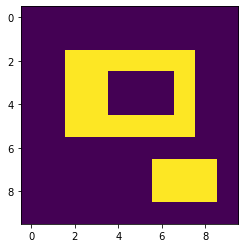

In [7]:
# 1.cv2.RETR_EXTERNAL
img = np.zeros([10,10],dtype=np.uint8)
img[2:6,2:8] = 1
img[7:9,6:9] = 1
img[3:5,4:7] = 0
img_show(img)

In [8]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# [ 1 -1 -1 -1]ÔºöË°®Á§∫Á¨¨0‰∏™ËΩÆÂªìÁöÑÂ±ÇÊ¨°ÔºåÂêé‰∏Ä‰∏™ÊòØÁ¨¨1‰∏™ÔºåÂâç‰∏Ä‰∏™‰∏çÂ≠òÂú®ÔºåÁ¨¨‰∏Ä‰∏™Â≠êËΩÆÂªì‰∏çÂ≠òÂú®ÔºåÁà∂ËΩÆÂªì‰∏çÂ≠òÂú®
# [-1  0 -1 -1]ÔºöË°®Á§∫Á¨¨1‰∏™ËΩÆÂªìÁöÑÂ±ÇÊ¨°ÔºåÂêé‰∏Ä‰∏™‰∏çÂ≠òÂú®ÔºåÂâç‰∏Ä‰∏™ÊòØ0ÔºåÁ¨¨‰∏Ä‰∏™Â≠êËΩÆÂªì‰∏çÂ≠òÂú®ÔºåÁà∂ËΩÆÂªì‰∏çÂ≠òÂú®
# Ê≠§Êó∂ËΩÆÂªìÈó¥ÂÖ≥Á≥ª‰∏∫Ôºö0-1

[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]


In [9]:
# 2.cv2.RETR_LIST
contours,hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# Ê≠§Êó∂ËΩÆÂªìÈó¥ÂÖ≥Á≥ª‰∏∫Ôºö0-1-2

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


In [10]:
# 3.cv2.RETR_CCOMP
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# Ê≠§Êó∂ËΩÆÂªìÈó¥ÂÖ≥Á≥ª‰∏∫Ôºö0-1
#                  |
#                  2

[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [-1 -1 -1  1]]]


In [11]:
# 4.cv2.RETR_TREE
contours,hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# Ê≠§Êó∂ËΩÆÂªìÈó¥ÂÖ≥Á≥ª‰∏∫Ôºö0-1
#                  |
#                  2

[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [-1 -1 -1  1]]]


### 12.1.2 ÁªòÂà∂ÂõæÂÉèËΩÆÂªìÔºödrawContoursÂáΩÊï∞

In [12]:
# image = cv2.drawContours(image,contours,contourIdx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offest]]]]])
# ËøîÂõûÂÄºÔºö
# imageÔºöÁõÆÊ†áÂõæÂÉèÔºåÂç≥ÁªòÂà∂‰∫ÜËæπÁºòÁöÑÂéüÂßãÂõæÂÉè
# ÂèÇÊï∞Ôºö
# imageÔºöÂæÖÁªòÂà∂ËΩÆÂªìÁöÑÂõæÂÉè„ÄÇÊ≥®ÊÑèÔºåËØ•ÂáΩÊï∞‰ºöÂú®image‰∏äÁõ¥Êé•ÁªòÂà∂ÂõæÂÉèÔºåÂ¶ÇÂéüÂßãimageËøòÊúâ‰ªñÁî®ÔºåÈúÄÂ§çÂà∂‰∏Ä‰ªΩÂá∫Êù•
# contoursÔºöÈúÄÁªòÂà∂ÁöÑËΩÆÂªìÔºålistÁ±ªÂûã
# contourIdxÔºöÈúÄË¶ÅÁªòÂà∂ÁöÑËæπÁºòÁ¥¢ÂºïÔºåÂëäËØâÂáΩÊï∞Ë¶ÅÁªòÂà∂Êüê‰∏ÄÊù°ËΩÆÂªìËøòÊòØÂÖ®ÈÉ®ËΩÆÂªìÔºå-1‰ª£Ë°®ÁªòÂà∂ÂÖ®ÈÉ®ËΩÆÂªì
# colorÔºöÁªòÂà∂ÁöÑÈ¢úËâ≤ÔºåRGBÊ†ºÂºèË°®Á§∫
# thicknessÔºöÂèØÈÄâÔºåÁîªÁ¨îÁ≤óÁªÜÔºåÂÄº‰∏∫-1Ë°®Á§∫ÁªòÂà∂ÂÆûÂøÉËΩÆÂªì
# lineTypeÔºöÂèØÈÄâÔºåË°®Á§∫ÁªòÂà∂ËΩÆÂªìÈÄâÁî®ÁöÑÁ∫øÂûã
# hierarchyÔºöÂ±ÇÊ¨°‰ø°ÊÅØ
# maxLevelÔºöÊéßÂà∂ÊâÄÁªòÂà∂ËΩÆÂªìÂ±ÇÊ¨°ÁöÑÊ∑±Â∫¶
# offsetÔºöÂÅèÁßªÂèÇÊï∞ÔºåËØ•ÂèÇÊï∞‰ΩøËΩÆÂªìÂÅèÁßªÂà∞‰∏çÂêåÁöÑ‰ΩçÁΩÆÂ±ïÁ§∫Âá∫Êù•
# ÂáΩÊï∞cv2.drawContour()ÁöÑÂèÇÊï∞imageÂíåËøîÂõûÂÄºimageÂú®ËøêÁÆóÂêéÁöÑÂÄºÊòØÁõ∏ÂêåÁöÑÔºåÂõ†Ê≠§ÂèØ‰ª•Â∞ÜÂáΩÊï∞cv2.drawContours()ÂÜôÊàêÊ≤°ÊúâËøîÂõûÂÄºÁöÑÂΩ¢Âºè

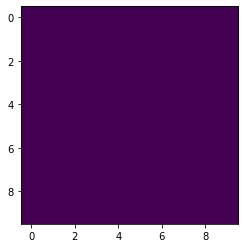

In [13]:
img = np.zeros([10,10],dtype=np.uint8)
img_show(img)

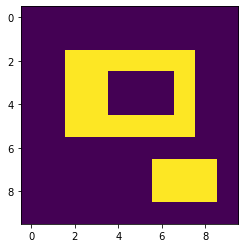

In [14]:
cv2.drawContours(img,contours,-1,(255,255,255))
img_show(img)

### 12.1.3 ËΩÆÂªìÂÆû‰æã

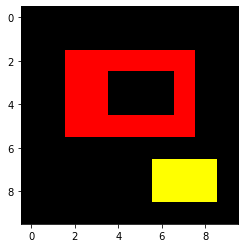

In [15]:
# ÈÄê‰∏™ÊòæÁ§∫ÂõæÂÉèÂÜÖÁöÑËæπÁºò‰ø°ÊÅØ
img = np.zeros([10,10,3],dtype=np.uint8)
img[2:6,2:8,0] = 0
img[2:6,2:8,1] = 0
img[2:6,2:8,2] = 255
img[7:9,6:9,0] = 0
img[7:9,6:9,1] = 255
img[7:9,6:9,2] = 255
img[3:5,4:7,0] = 0
img[3:5,4:7,1] = 0
img[3:5,4:7,2] = 0
img_show(img)

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

n = len(contours)
contoursImg = []
for i in range(n):
    temp = np.zeros(img.shape,np.uint8)
    contoursImg.append(cv2.drawContours(temp,contours,i,(255,255,255),1))

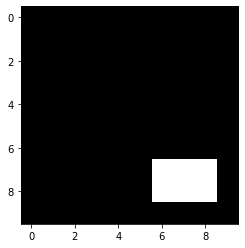

In [17]:
img_show(contoursImg[0])

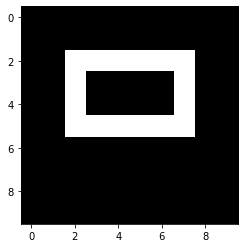

In [18]:
img_show(contoursImg[1])

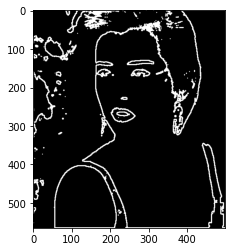

In [19]:
# ‰ΩøÁî®ËΩÆÂªìÁªòÂà∂ÂäüËÉΩÊèêÂèñÂâçÊôØÂõæÂÉè
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
gray = cv2.cvtColor(wzx,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,bierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(wzx.shape,np.uint8)
cv2.drawContours(mask,contours,-1,(255,255,255),2)
img_show(mask)

# 12.2 Áü©ÁâπÂæÅ

In [20]:
# ÊØîËæÉ‰∏§‰∏™ËΩÆÂªìÊúÄÁÆÄÂçïÁöÑÊñπÊ≥ïÊòØÊØîËæÉ‰∫åËÄÖÁöÑËΩÆÂªìÁü©
# ËΩÆÂªìÁü©‰ª£Ë°®‰∫Ü‰∏Ä‰∏™ËΩÆÂªìÔºå‰∏ÄÂπÖÂõæÂÉèÔºå‰∏ÄÁªÑÁÇπÈõÜÁöÑÂÖ®ÈÉ®ÁâπÂæÅ
# Áü©ÁâπÂæÅÂåÖÂê´‰∫ÜÂØπÂ∫îÂØπË±°‰∏çÂêåÁ±ªÂûãÁöÑÂá†‰ΩïÁâπÂæÅÔºåÂ¶ÇÂ§ßÂ∞èÔºå‰ΩçÁΩÆÔºåËßíÂ∫¶ÔºåÂΩ¢Áä∂Á≠â
# Áü©ÁâπÂæÅË¢´ÂπøÊ≥õÂ∫îÁî®Âú®Ê®°ÂºèËØÜÂà´ÔºåÂõæÂÉèËØÜÂà´Á≠âÊñπÈù¢

### 12.2.1 Áü©ÁöÑËÆ°ÁÆóÔºömomentsÂáΩÊï∞

In [21]:
# opencv‰ΩøÁî®ÂáΩÊï∞cv2.momoents()Êù•Ëé∑ÂèñËΩÆÂªìÁöÑÁâπÂæÅ--ËΩÆÂªìÁü©
# retval = cv2.momoents(array[binaryImage])
# arrayÔºöÂèØ‰ª•ÊòØÁÇπÈõÜÔºå‰πüÂèØÊòØÁÅ∞Â∫¶ÂõæÂÉèÊàñËÄÖ‰∫åÂÄºÂõæÂÉè„ÄÇÂΩìarrayÊòØÁÇπÈõÜÊó∂ÔºåÂáΩÊï∞‰ºöÊääËøô‰∫õÁÇπÈõÜÂΩìÊàêËΩÆÂªì‰∏≠ÁöÑÂÆöÁÇπÔºåÊääÊï¥‰∏™ÁÇπÈõÜ‰Ωú‰∏∫‰∏ÄÊù°ËΩÆÂªì
# binaryImageÔºö‰∏∫TrueÊó∂ÔºåarrayÂÜÖÁöÑÊâÄÊúâÈùû0ÂÄºÈÉΩË¢´Â§ÑÁêÜ‰∏∫1ÔºåËØ•ÂèÇÊï∞Âè™Âú®ÂèÇÊï∞array‰∏∫ÂõæÂÉèÊó∂ÊúâÊïà

# retvalÔºöÁü©ÁâπÂæÅÔºå‰∏ªË¶ÅÂåÖÊã¨Ôºö
# 1ÔºâÁ©∫Èó¥Áü©
# Èõ∂Áü©ÈòµÔºöm00
# ‰∏ÄÈò∂Áü©Ôºöm10Ôºåm01
# ‰∫åÈò∂Áü©Ôºöm20Ôºåm11Ôºåm02
# ‰∏âÈò∂Áü©Ôºöm30Ôºåm21Ôºåm12Ôºåm03
# 2Ôºâ‰∏≠ÂøÉÁü©
# ‰∫åÈò∂‰∏≠ÂøÉÁü©Ôºömu20Ôºåmu11Ôºåmu02
# ‰∏âÈò∂‰∏≠ÂøÉÁü©Ôºömu30Ôºåmu21Ôºåmu12Ôºåmu03
# 3ÔºâÂΩí‰∏ÄÂåñÁü©
# ‰∫åÈò∂HuÁü©Ôºönu20Ôºånu11Ôºånu02
# ‰∏âÈò∂HuÁü©Ôºönu30Ôºånu21Ôºånu12Ôºånu03

# ‰∏äËø∞Áü©ÈÉΩÊòØÈÄöËøáËÆ°ÁÆóÂæóÂà∞ÁöÑÔºåÊØîËæÉÊäΩË±°Ôºå‰ΩÜÂæàÊòéÊòæÔºåÂ¶ÇÊûú‰∏§‰∏™ËΩÆÂªìÁöÑÁü©‰∏ÄËá¥ÔºåÂàôËøô‰∏§‰∏™ËΩÆÂªìÂ∞±ÊòØ‰∏ÄËá¥ÁöÑ
# Èõ∂Èò∂Áü©m00ÁöÑÂê´‰πâÊØîËæÉÁõ¥ËßÇÔºå‰ª£Ë°®‰∏Ä‰∏™ËΩÆÂªìÁöÑÈù¢ÁßØ
# cv2.moments()ËøîÂõûÁöÑÁâπÂæÅÁü©ÔºåËÉΩÁî®Êù•Âà§Êñ≠‰∏§‰∏™ËΩÆÂªìÊòØÂê¶Áõ∏‰ººÔºå‰æãÂ¶Ç‰∏§‰∏™ËΩÆÂªì‰∏çÁÆ°‰ΩçÁΩÆÂú®Âì™ÔºåÂèØ‰ª•Áî®m00Áü©Âà§Êñ≠Èù¢ÁßØÊòØÂê¶‰∏ÄËá¥
# ‰∏≠ÂøÉÁü©ÈÄöËøáÂáèÂéªÂùáÂÄºËÄåËé∑ÂæóÂπ≥Áßª‰∏çÂèòÊÄßÔºåËÉΩÂ§üÊØîËæÉ‰∏çÂêå‰ΩçÁΩÆ‰∏§‰∏™ÂØπË±°ÊòØÂê¶‰∏ÄËá¥Ôºå‰∏≠ÂøÉÁü©ËÉΩÂøΩÁï•‰ΩçÁΩÆÂÖ≥Á≥ª
# Èô§ËÄÉËôëÂπ≥Áßª‰∏çÂèòÊÄßÂ§ñÔºåËøò‰ºöËÄÉËôëÁº©ÊîæÂêéÂØπË±°ÁöÑ‰∏ÄËá¥ÊÄßÔºåÂΩí‰∏ÄÂåñ‰∏≠ÂøÉÁü©ÈÄöËøáÈô§‰ª•Áâ©‰ΩìÊÄªÂ∞∫ÂØ∏Ëé∑ÂæóÁº©Êîæ‰∏çÂèòÊÄßÔºå
# ÂÆÉÈÄöËøáËÆ°ÁÆóÊèêÂèñÂØπË±°ÁöÑÂΩí‰∏ÄÂåñ‰∏≠ÂøÉÁü©Â±ûÊÄßÂÄºÔºåËØ•Â±ûÊÄßÂÄº‰∏ç‰ªÖÂÖ∑ÊúâÂπ≥Áßª‰∏çÂèòÊÄßÔºåËøòÂÖ∑ÊúâÁº©Êîæ‰∏çÂèòÊÄß

# Âú®opencv‰∏≠ÔºåÂáΩÊï∞cv2.moments()‰ºöÂêåÊó∂ËÆ°ÁÆó‰∏äËø∞Á©∫Èó¥Áü©Ôºå‰∏≠ÂøÉÁü©ÔºåÂΩí‰∏ÄÂåñ‰∏≠ÂøÉÁü©

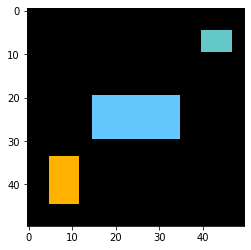

In [22]:
# ‰ΩøÁî®cv2.moments()ÊèêÂèñ‰∏ÄÂπÖÂõæÂÉèÁöÑÁâπÂæÅ
img = np.zeros([50,50,3],np.uint8)
img[34:45,5:12,0] = 0
img[34:45,5:12,1] = 178
img[34:45,5:12,2] = 255
img[20:30,15:35,0] = 255
img[20:30,15:35,1] = 200
img[20:30,15:35,2] = 100
img[5:10,40:47,0] = 200
img[5:10,40:47,1] = 200
img[5:10,40:47,2] = 100
img_show(img)

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# ret,binary = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

n = len(contours)
contoursImg = []
for i in range(n):
    temp = np.zeros(img.shape,dtype=np.uint8)
    contoursImg.append(temp)
    contoursImg[i] = cv2.drawContours(temp,contours,i,(255,255,255),1)


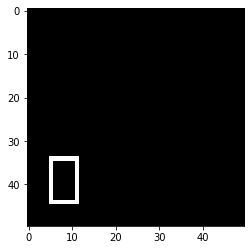

In [24]:
img_show(contoursImg[0])

In [25]:
# ËßÇÂØüÂêÑ‰∏™ËΩÆÂªìÁöÑÁü©
for i in range(n):
    print('ËΩÆÂªì'+str(i)+'ÁöÑÁü©Ôºö\n',cv2.moments(contours[i]))
print()
for i in range(n):
    print('ËΩÆÂªì'+str(i)+'ÁöÑÈù¢ÁßØÔºö',cv2.moments(contours[i])['m00'])

ËΩÆÂªì0ÁöÑÁü©Ôºö
 {'m00': 60.0, 'm10': 480.0, 'm01': 2340.0, 'm20': 4020.0, 'm11': 18720.0, 'm02': 91760.0, 'm30': 35040.0, 'm21': 156780.0, 'm12': 734080.0, 'm03': 3617640.0, 'mu20': 180.0, 'mu11': 0.0, 'mu02': 500.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.05, 'nu11': 0.0, 'nu02': 0.1388888888888889, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
ËΩÆÂªì1ÁöÑÁü©Ôºö
 {'m00': 171.0, 'm10': 4189.5, 'm01': 4189.5, 'm20': 107787.0, 'm11': 102642.75, 'm02': 103797.0, 'm30': 2892849.75, 'm21': 2640781.5, 'm12': 2543026.5, 'm03': 2599584.75, 'mu20': 5144.25, 'mu11': 0.0, 'mu02': 1154.25, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.1759259259259259, 'nu11': 0.0, 'nu02': 0.03947368421052631, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
ËΩÆÂªì2ÁöÑÁü©Ôºö
 {'m00': 24.0, 'm10': 1032.0, 'm01': 168.0, 'm20': 44448.0, 'm11': 7224.0, 'm02': 1208.0, 'm30': 1917456.0, 'm21': 311136.0, 'm12': 51944.0, 'm03': 8904.0, 'mu20': 72.0, 'mu11': 0.0, 'mu02': 32.0

### 12.2.2 ËÆ°ÁÆóËΩÆÂªìÁöÑÈù¢ÁßØÔºöcontourAreaÂáΩÊï∞

In [26]:
# retVal = cv2.contourArea(contour[,oriented])
# retValÔºöÈù¢ÁßØËøîÂõûÂÄº
# contourÔºöËΩÆÂªì
# orientedÔºöÂ∏ÉÂ∞îÂÄºÔºåTrueÊó∂ÔºåËøîÂõûÂÄºÂåÖÂê´Ê≠£Ë¥üÂè∑ÔºåË°®Á§∫ËΩÆÂªìÊó∂È°∫Êó∂ÈíàËøòÊòØÈÄÜÊó∂ÈíàÔºåÈªòËÆ§FalseÔºåËøîÂõûÁªùÂØπÂÄº

In [27]:
area = cv2.contourArea(contours[0])
area

60.0

### 12.2.3 ËÆ°ÁÆóËΩÆÂªìÁöÑÈïøÂ∫¶ÔºöarcLengthÂáΩÊï∞

In [28]:
# retVal = cv2.arcLength(curve,closed)
# retValÔºöËΩÆÂªìÈïøÂ∫¶ÔºàÂë®ÈïøÔºâ
# curveÔºöËΩÆÂªì
# closedÔºöÂ∏ÉÂ∞îÂÄºÔºåÁî®Êù•Ë°®Á§∫ËΩÆÂªìÊòØÂê¶Â∞ÅÈó≠ÔºåTrueË°®Á§∫Â∞ÅÈó≠

In [29]:
lenth = cv2.arcLength(contours[0],1)
lenth

32.0

# 12.3 HuÁü©

### 12.3.1 HuÁü©ÂáΩÊï∞

In [30]:
# HuÁü©Êó∂ÂΩí‰∏ÄÂåñ‰∏≠ÂøÉÁü©ÁöÑÁ∫øÊÄßÁªÑÂêà
# HuÁü©Âú®ÂõæÂÉèÊóãËΩ¨ÔºåÁº©ÊîæÔºåÂπ≥ÁßªÁ≠âÊìç‰ΩúÂêéÔºå‰ªçËÉΩ‰øùÊåÅÁü©ÁöÑ‰∏çÂèòÊÄßÔºåÊâÄ‰ª•ÁªèÂ∏∏‰ΩøÁî®HuÁü©Êù•ËØÜÂà´ÂõæÂÉèÁöÑÁâπÂæÅ

# opencv‰∏≠‰ΩøÁî®ÂáΩÊï∞cv2.HuMoments()ÂèØ‰ª•ÂæóÂà∞HuÁü©ÔºåËØ•ÂáΩÊï∞‰ΩøÁî®cv2.moments()ÂáΩÊï∞ÁöÑËøîÂõûÂÄº‰Ωú‰∏∫ÂèÇÊï∞ÔºåËøîÂõû7‰∏™HuÁü©ÂÄº
# hu = cv2.HuMoments(m)
# huÔºöËøîÂõûÁöÑHuÁü©ÂÄº
# mÔºöÁî±ÂáΩÊï∞cv2.moments()ËÆ°ÁÆóÂæóÂà∞ÁöÑÁü©ÁâπÂæÅÂÄº

# ÂáΩÊï∞cv2.moments()ËøîÂõûÁöÑÂΩí‰∏ÄÂåñ‰∏≠ÂøÉÁü©‰∏≠ÂåÖÂê´Ôºö
# ‰∫åÈò∂HuÁü©Ôºönu20Ôºånu11Ôºånu02
# ‰∏âÈò∂HuÁü©Ôºönu30Ôºånu21,nu12,nu03
# ‰∏äËø∞7‰∏™HuÁü©ÁöÑËÆ°ÁÆóÂÖ¨ÂºèËßÅÊï∞P248

In [31]:
# È™åËØÅh0=nu20+nu02
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
HuM1 = cv2.HuMoments(cv2.moments(gray)).flatten()

In [32]:
cv2.moments(gray)

{'m00': 57933.0,
 'm10': 1371489.0,
 'm01': 1453207.0,
 'm20': 38932719.0,
 'm11': 29820581.0,
 'm02': 41082723.0,
 'm30': 1238775489.0,
 'm21': 749517251.0,
 'm12': 752119809.0,
 'm03': 1254484777.0,
 'mu20': 6464487.126611777,
 'mu11': -4582219.048728704,
 'mu02': 4630086.595032193,
 'mu30': 11016839.90241623,
 'mu21': -10125331.603856832,
 'mu12': 9422605.501903772,
 'mu03': -8330011.525967836,
 'nu20': 0.0019261142211688352,
 'nu11': -0.00136528654190282,
 'nu02': 0.0013795488275044204,
 'nu30': 1.3637726980104254e-05,
 'nu21': -1.2534130405774098e-05,
 'nu12': 1.1664226984728026e-05,
 'nu03': -1.031170679963821e-05}

In [33]:
print(HuM1)

[ 3.30566305e-03  7.75476310e-06  1.20081552e-09  1.16212115e-09
  1.37214489e-18  3.22141949e-12 -4.32148909e-20]


In [34]:
print(HuM1[0])
print(cv2.moments(gray)["nu20"]+cv2.moments(gray)["nu02"])

0.003305663048673256
0.003305663048673256


In [35]:
# HuÁü©‰πãÂ∑ÆÔºöHuM1-HuM2

### 12.3.2 ÂΩ¢Áä∂ÂåπÈÖç

In [36]:
# ÂèØ‰ª•ÈÄöËøáHuÁü©Êù•Âà§Êñ≠‰∏§‰∏™ÂØπË±°ÁöÑ‰∏ÄËá¥ÊÄßÔºåÂ¶Ç‰∏äÈù¢ËØ¥ÁöÑ‰∏§‰∏™HuÁöÑÂ∑Æ
# ‰∏∫Êõ¥Áõ¥ËßÇÊØîËæÉHuÁü©ÂÄºÔºåopencvÊèê‰æõ‰∫ÜÂáΩÊï∞cv2.matchShapes()ÂØπ‰∏§‰∏™ÂØπË±°ÁöÑHuÁü©ËøõË°åÊØîËæÉ
# Ëøô‰∏§‰∏™ÂØπË±°ÂèØ‰ª•Êó∂ËΩÆÂªìÔºå‰πüÂèØ‰ª•Êó∂ÁÅ∞Â∫¶ÂÄºÔºå‰∏çÁÆ°ÊòØ‰ªÄ‰πàÔºåËØ•ÂáΩÊï∞ÈÉΩ‰ºöÊèêÂâçËÆ°ÁÆóÂ•ΩÂØπË±°ÁöÑHuÁü©ÂÄº

# retVal = cv2.matchShapes(contour1,contour2,method,parameter)
# contour1ÔºöÁ¨¨‰∏Ä‰∏™ËΩÆÂªìÊàñËÄÖÁÅ∞Â∫¶ÂõæÂÉè
# contour2ÔºöÁ¨¨‰∫å‰∏™ËΩÆÂªìÊàñËÄÖÁÅ∞Â∫¶ÂõæÂÉè
# methodÔºöÊØîËæÉ‰∏§‰∏™ÂØπË±°ÁöÑHuÁü©ÁöÑÊñπÊ≥ïÔºö
# cv2.CONTOURS_MATCH_11
# cv2.CONTOURS_MATCH_12
# cv2.CONTOURS_MATCH_13
# paramterÔºöÂ∫îÁî®‰∫émethodÁöÑÁâπÂÆöÂèÇÊï∞Ôºå‰∏∫Êâ©Â±ïÂèÇÊï∞ÔºåÁõÆÂâçÔºàÊà™Ëá≥opencv 4.1.0ÔºâÊöÇ‰∏çÊîØÊåÅËØ•ÂèÇÊï∞ÔºåÂõ†Ê≠§ËØ•ÂÄºËÆæÁΩÆ‰∏∫0

In [37]:
# ‰ΩøÁî®ÂáΩÊï∞cv2.matchShapes()ËÆ°ÁÆó‰∏çÂêåÂõæÂÉèÁöÑÂåπÈÖçÂ∫¶
o1 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
o2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/log.jpg")
gray1 = cv2.cvtColor(o1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(o2,cv2.COLOR_BGR2GRAY)
ret,binary1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY)
ret,binary2 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY)
contours1,hierarchy = cv2.findContours(binary1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours2,hierarchy = cv2.findContours(binary2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]
cnt2 = contours2[0]
ret1 = cv2.matchShapes(cnt1,cnt1,1,0)
ret2 = cv2.matchShapes(cnt1,cnt2,1,0)
print("ret1:",ret1)
print("ret2:",ret2)

ret1: 0.0
ret2: 0.2810427321678761


In [38]:
# ‰ªéÁªìÊûúÂèØÁúãÂá∫Ôºö
# Âêå‰∏ÄÂπÖÂõæÂÉèÁöÑHuÁü©ÊòØ‰∏çÂèòÁöÑÔºå‰∫åËÄÖÂ∑ÆÂÄº‰∏∫0
# Áõ∏‰ººÁöÑÂõæÂÉèÂèëÁîü‰∫ÜÂπ≥ÁßªÔºåÊóãËΩ¨ÔºåÁº©ÊîæÂêéÔºåcv2.matchShapes()ËøîÂõûÂÄº‰ªçÁÑ∂ÊØîËæÉÊé•Ëøë
# ‰∏çÁõ∏‰ººÁöÑÂõæÂÉèÁöÑËøîÂõûÂÄºÁöÑÂ∑ÆËæÉÂ§ß

# 12.4 ËΩÆÂªìÊãüÂêà

In [39]:
# Âú®ËÆ°ÁÆóËΩÆÂªìÊó∂ÂèØËÉΩÂπ∂‰∏çÈúÄË¶ÅÂÆûÈôÖÁöÑËΩÆÂªìÔºåËÄå‰ªÖÈúÄË¶Å‰∏Ä‰∏™Êé•Ëøë‰∫éËΩÆÂªìÁöÑËøë‰ººÂ§öËæπÂΩ¢ÔºåopencvÊèê‰æõ‰∫ÜÂ§öÁßçËÆ°ÁÆóËΩÆÂªìËøë‰ººÂ§öËæπÂΩ¢ÁöÑÊñπÊ≥ï

### 12.4.1 Áü©ÂΩ¢ÂåÖÂõ¥Ê°Ü

In [40]:
# ÂáΩÊï∞cv2.boundingRect()ËÉΩÂ§üÁªòÂà∂ËΩÆÂªìÁöÑÁü©ÂΩ¢ËæπÁïå
# retVal = cv2.boundingRect(array)
# retValÔºöËøîÂõûÁöÑÁü©ÂΩ¢ËæπÁïåÁöÑÂ∑¶‰∏äËßíÈ°∂ÁÇπÁöÑÂùêÊ†áÂÄºÂèäÁü©ÂΩ¢ÂÆΩÔºåÈ´ò
# arrayÔºöËΩÆÂªìÔºåÊàñÁÅ∞Â∫¶ÂõæÂÉè
# ËØ•ÂáΩÊï∞ËøòÂèØ‰ª•ÊòØÂÖ∑Êúâ4‰∏™ËøîÂõûÂÄºÁöÑÂΩ¢ÂºèÔºö
# x,y,w,h = cv2.boundingRect(array)

rect1: (16, 362, 137, 66)


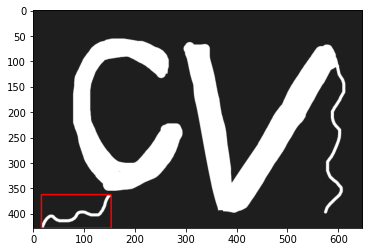

In [42]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.boundingRect(contours[0])
x,y,w,h = rect
brect = np.array([[[x,y]],[[x+w,y]],[[x+w,y+h]],[[x,y+h]]])
cv2.drawContours(cv,[brect],-1,(0,0,255),2)
# cv = cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),5)
print("rect1:",rect)
img_show(cv)

### 12.4.2 ÊúÄÂ∞èÂåÖÂõ¥Áü©ÂΩ¢Ê°Ü

In [43]:
# ÂáΩÊï∞cv2.minAreaRect()ÊûÑÈÄ†‰∏Ä‰∏™Èù¢ÁßØÊúÄÂ∞èÁöÑÊúÄÂ∞èÂ§ñÊé•Áü©ÂΩ¢
# retval = cv2.minAreaRect(points)
# retvalÔºöËøîÂõûÁöÑÁü©ÂΩ¢ÁâπÂæÅ‰ø°ÊÅØÔºàÊúÄÂ∞èÂ§ñÊé•Áü©ÂΩ¢ÁöÑ‰∏≠ÂøÉ(x,y)Ôºå(ÂÆΩÔºåÈ´ò)ÔºåÊóãËΩ¨ËßíÂ∫¶Ôºâ
# pointsÔºöËΩÆÂªì

# Ê≥®ÊÑèÔºåretvalÁöÑÁªìÊûÑ‰∏çÁ¨¶ÂêàÂáΩÊï∞cv2.drawContours()ÂèÇÊï∞Ë¶ÅÊ±Ç
# ÂáΩÊï∞cv2.boxPoint()ËÉΩÂ∞ÜretvalËΩ¨Êç¢‰∏∫Á¨¶ÂêàË¶ÅÊ±ÇÁöÑÁªìÊûÑ
# points = cv2.boxPoint(box)
# pointsÔºöËÉΩÁî®‰∫écv2.drawContours()ÂèÇÊï∞ÁöÑËΩÆÂªìÁÇπ
# boxÔºöcv2.minAreaRect()ËÆ°ÁÆóÁöÑÂõæÂÉèÊúÄÂ∞èÂ§ñÊé•Áü©ÂΩ¢Ê°Ü

rect: ((86.24761199951172, 401.01806640625), (34.16382598876953, 149.108154296875), 70.97439575195312)
points: [[ 10 409]
 [151 360]
 [162 392]
 [ 21 441]]


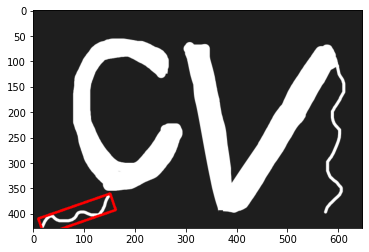

In [44]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

rect = cv2.minAreaRect(contours[0])
points = cv2.boxPoints(rect)
points = np.int0(points)  # ÂèñÊï¥

cv2.drawContours(cv,[points],0,(0,0,255),3)
img_show(cv)
print("rect:",rect)
print("points:",points)

### 12.4.3 ÊúÄÂ∞èÂ§ñÂåÖÂúÜÂΩ¢

In [45]:
# ÂáΩÊï∞cv2.minEnclosingCircle()ÈÄöËøáËø≠‰ª£ÁÆóÊ≥ïÔºåÊûÑÈÄ†‰∏Ä‰∏™ÂØπË±°Èù¢ÁßØÊúÄÂ∞èÁöÑÊúÄÂ∞èÂ§ñÂåÖÂúÜÂΩ¢
# center,radius = cv2.minEnclosingCircle(points)
# ceterÔºöÊúÄÂ∞èÂ§ñÂåÖÂúÜÂΩ¢ÁöÑ‰∏≠ÂøÉ
# radiusÔºöÊúÄÂ∞èÂ§ñÂåÖÂúÜÂΩ¢ÁöÑÂçäÂæÑ
# pointsÔºöËΩÆÂªì

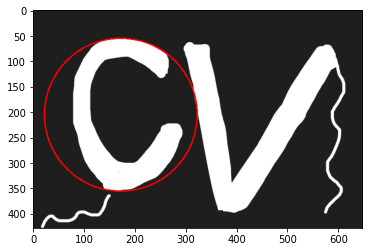

In [46]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

(x,y),radius = cv2.minEnclosingCircle(contours[2])
center = (int(x),int(y))
radius = int(radius)

cv2.circle(cv,center,radius,(0,0,255),2)
img_show(cv)

### 12.4.4 ÊúÄ‰ºòÊãüÂêàÊ§≠ÂúÜ

In [47]:
# ÂáΩÊï∞cv2.fitEllipse()ÂèØ‰ª•ÊûÑÈÄ†ÊúÄ‰ºòÊãüÂêàÊ§≠ÂúÜ
# retval = cv2.fitEllipse(points)
# retvalÔºöRotatedRectÁ±ªÂûãÂÄºÔºåËøôÊòØÂõ†‰∏∫ËØ•ÂáΩÊï∞ËøîÂõûÁöÑÊòØÊãüÂêàÊ§≠ÂúÜÁöÑÂ§ñÊé•Áü©ÂΩ¢Ôºå
# retvalÂåÖÂê´Â§ñÊé•Áü©ÂΩ¢ÁöÑË¥®ÂøÉÔºåÂÆΩÔºåÈ´òÔºåÊóãËΩ¨ËßíÂ∫¶Á≠â‰ø°ÊÅØÔºåËøô‰∫õ‰ø°ÊÅØÊ≠£Â•Ω‰∏éÊ§≠ÂúÜ‰∏≠ÁöÑ‰∏≠ÂøÉÁÇπÔºåËΩ¥ÈïøÂ∫¶ÔºåÊóãËΩ¨ËßíÂ∫¶Á≠â‰ø°ÊÅØÂêªÂêà
# pointsÔºöËΩÆÂªì

ellipse: ((183.6658172607422, 200.66261291503906), (201.35049438476562, 285.8033752441406), 174.46080017089844)


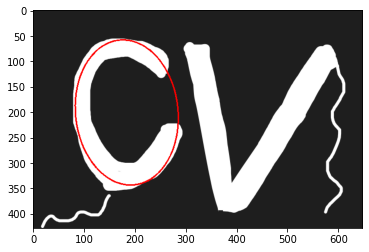

In [48]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

ellipse = cv2.fitEllipse(contours[2])
cv2.ellipse(cv,ellipse,(0,0,255),2)
img_show(cv)
print("ellipse:",ellipse)

### 12.4.5 ÊúÄ‰ºòÊãüÂêàÁõ¥Á∫ø

In [49]:
# line = cv2.fitLine(points,distType,param,reps,aeps)
# lineÔºöËøîÂõûÂÄº
# pointsÔºöËΩÆÂªì
# distTypeÔºöË∑ùÁ¶ªÁ±ªÂûãÔºåË¶Å‰ΩøËæìÂÖ•ÁÇπÂà∞ÊãüÂêàÁõ¥Á∫øÁöÑË∑ùÁ¶ª‰πãÂíåÊúÄÂ∞èÔºåÁ±ªÂûãËßÅ‰π¶P261
# cv2.DIST_USER
# cv2.DIST_L1
# cv2.DIST_L2
# cv2.DIST_C
# cv2.DIST_L12
# cv2.DIST_FAIR
# cv2.DIST_WELSCH
# cv2.DIST_HUBER
# paramÔºöË∑ùÁ¶ªÂèÇÊï∞Ôºå‰∏éÈÄâÁöÑË∑ùÁ¶ªÁ±ªÂûãÊúâÂÖ≥Ôºå‰∏∫0Êó∂ÔºåÂáΩÊï∞Ëá™Âä®ÈÄâÊã©ÊúÄ‰ºòÂÄº
# repsÔºöÊãüÂêàÁõ¥Á∫øÊâÄÈúÄË¶ÅÁöÑÂæÑÂêëÁ≤æÂ∫¶ÔºåÈÄöÂ∏∏ËÆæ‰∏∫0.01
# aepsÔºöÊãüÂêàÁõ¥Á∫øÊâÄÈúÄË¶ÅÁöÑËßíÂ∫¶Á≤æÂ∫¶ÔºåÈÄöÂ∏∏ËÆæ‰∏∫0.01

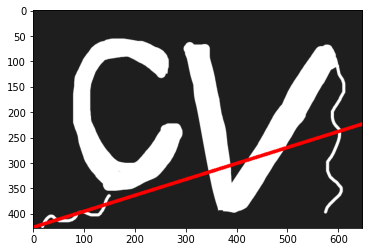

In [50]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

h,w = cv.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contours[0],cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx)+y)
righty = int(((w-x)*vy/vx)+y)
cv2.line(cv,(w-1,righty),(0,lefty),(0,0,255),5)
img_show(cv)

### 12.4.6 ÊúÄÂ∞èÂ§ñÂåÖ‰∏âËßíÂΩ¢

In [51]:
# retval,triangle = cv2.minEnclosingTriangle(points)
# retvalÔºöÊúÄÂ∞èÂ§ñÂåÖ‰∏âËßíÂΩ¢Èù¢ÁßØ
# triangleÔºöÊúÄÂ∞èÂ§ñÂåÖ‰∏âËßíÂΩ¢‰∏â‰∏™È°∂ÁÇπÈõÜ
# pointsÔºöËΩÆÂªì

<ipython-input-52-92df7a9db532>:8: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(cv,tuple(trgl[i][0]),tuple(trgl[(i+1)%3][0]),(0,0,255),3)


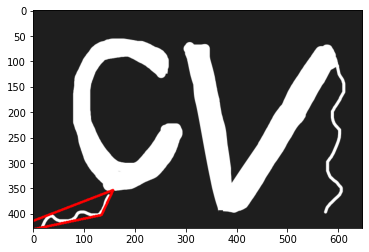

In [52]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

area,trgl = cv2.minEnclosingTriangle(contours[0])
for i in range(0,3):
    cv2.line(cv,tuple(trgl[i][0]),tuple(trgl[(i+1)%3][0]),(0,0,255),3)
img_show(cv)

### 12.4.7 ÈÄºËøëÂ§öËæπÂΩ¢

In [53]:
# approxCurve = cv2.approxPolyDP(curve,epsilon,closed)
# approxCurveÔºöÈÄºËøëÂ§öËæπÂΩ¢ÁöÑÁÇπÈõÜ
# curveÔºöËΩÆÂªì
# epsilonÔºöÁ≤æÂ∫¶ÔºåÂéüÂßãËΩÆÂªìÁöÑËæπÁïåÁÇπ‰∏éÈÄºËøëÂ§öËæπÂΩ¢ËæπÁïåÈó¥ÁöÑÊúÄÂ§ßË∑ùÁ¶ª
# closedÔºöÂ∏ÉÂ∞îÂÄºÔºåTrueÔºöÈÄºËøëÂ§öËæπÂΩ¢ÊòØÂ∞ÅÈó≠ÁöÑÔºåÂèç‰πã

# cv2.approxPolyDP()ÈááÁî®ÁöÑÊòØDouglas-PeuckerÁÆóÊ≥ïÔºàDPÁÆóÊ≥ïÔºâÔºö
# ËØ•ÁÆóÊ≥ïÁ∫øÊâæÂà∞ËΩÆÂªì‰∏≠Ë∑ùÁ¶ªÊúÄËøúÁöÑ‰∫ÆÁÇπÔºåÂπ∂Â∞Ü‰∫ÆÁÇπËøûÊé•
# Êé•ÁùÄÔºåÂú®ËΩÆÂªì‰∏äÊâæÂà∞‰∏Ä‰∏™Ë∑ùÁ¶ªÂΩìÂâçÁõ¥Á∫øÊúÄËøúÁöÑÁÇπÔºåÂπ∂Â∞ÜËØ•ÁÇπ‰∏éÂéüÁõ¥Á∫øËøûÊàêÂ∞ÅÈó≠ÁöÑÂ§öËæπÂΩ¢ÔºåÊ≠§Êó∂ÂæóÂà∞‰∏âËßíÂΩ¢
# Ëø≠‰ª£‰∏äËø∞ËøáÁ®ãÔºåÂ∞ÜÊñ∞ÊâæÂà∞ÁöÑÁÇπÂä†ÂÖ•ÁªìÊûú‰∏≠ÔºåÂΩìËΩÆÂªì‰∏äÊâÄÊúâÁÇπÂà∞Â§öËæπÂΩ¢ÁöÑË∑ùÁ¶ªÈÉΩÂ∞è‰∫éepsilonÊó∂ÂÅúÊ≠¢

ÊòØÂê¶‰∏∫Âá∏Â§öËæπÂΩ¢Ôºö False


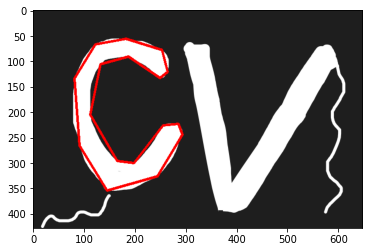

In [54]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

epsilon = 0.01*cv2.arcLength(contours[2],True)
approx = cv2.approxPolyDP(contours[2],epsilon,True)
cv2.drawContours(cv,[approx],0,(0,0,255),3)

print("ÊòØÂê¶‰∏∫Âá∏Â§öËæπÂΩ¢Ôºö",cv2.isContourConvex(approx))  # Âà§Êñ≠ÊòØÂê¶‰∏∫Âá∏ÂΩ¢ÁöÑ
img_show(cv)

# 12.5 Âá∏ÂåÖ

In [55]:
# ÈÄºËøëÂ§öËæπÂΩ¢ÊòØËΩÆÂªìÁöÑÈ´òÂ∫¶Ëøë‰ºº
# Âá∏ÂåÖ‰∏éÈÄºËøëÂ§öËæπÂΩ¢ÂæàÂÉèÔºåÂÆÉÊòØÁâ©‰ΩìÊúÄÂ§ñÂ±ÇÁöÑÂá∏Â§öËæπÂΩ¢ÔºåÂÆÉÂÆåÂÖ®ÂåÖÊã¨ÂéüÊúâËΩÆÂªìÔºåÂπ∂‰∏î‰ªÖÁî±ËΩÆÂªì‰∏äÁöÑÁÇπÊûÑÊàêÁöÑÂ§öËæπÂΩ¢
# Âá∏ÂåÖÁöÑÊØè‰∏ÄÂ§ÑÈÉΩÊòØÂá∏ÁöÑÔºåÂç≥Âú®Âá∏ÂåÖÂÜÖËøûÊé•‰ªªÊÑè‰∫ÆÁÇπÁöÑÁõ¥Á∫øÈÉΩÂú®Âá∏ÂåÖÂÜÖÔºå‰ªªÊÑèËøûÁª≠‰∏â‰∏™ÁÇπÁöÑÂÜÖËßíÂ∞è‰∫é180Â∫¶

### 12.5.1 Ëé∑ÂèñÂá∏ÂåÖ

In [56]:
# opencvÊèê‰æõÂáΩÊï∞cv2.convexHull()Ëé∑ÂèñËΩÆÂªìÁöÑÂá∏ÂåÖ
# hull = cv2.convexHull(points[,clockwise[,returnPoints]])
# hullÔºöËøîÂõûÂá∏ÂåÖÁöÑËßíÁÇπ
# pointsÔºöËΩÆÂªì
# clockPointsÔºöÂ∏ÉÂ∞îÂÄºÔºåTrueÊó∂ÔºåÂá∏ÂåÖËßíÁÇπÊåâÈ°∫Êó∂ÈíàÊñπÂêëÊéíÂàóÔºåÂèç‰πã
# returnPointsÔºöÂ∏ÉÂ∞îÂÄºÔºåÈªòËÆ§TrueÔºåËøîÂõûÂá∏ÂåÖËßíÁÇπÁöÑx/yËΩ¥ÂùêÊ†áÔºåFalseÊó∂ÔºåËøîÂõûËΩÆÂªì‰∏≠Âá∏ÂåÖËßíÁÇπÁöÑÁ¥¢Âºï

In [58]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hull1 = cv2.convexHull(contours[2])
hull2 = cv2.convexHull(contours[2],returnPoints=False)
# print("hull1:",hull1)
# print("hull2:",hull2)

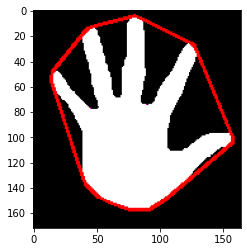

In [59]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hull = cv2.convexHull(contours[0])
cv2.polylines(hand,[hull],True,(0,0,255),2)
img_show(hand)

### 12.5.2 Âá∏Áº∫Èô∑

In [60]:
# 1.ÊµãËØïËΩÆÂªìÊòØÂê¶ÊòØÂá∏ÂΩ¢ÁöÑ
# Âá∏ÂåÖ‰∏éËΩÆÂªì‰πãÈó¥ÁöÑÈÉ®ÂàÜÁß∞‰∏∫Âá∏Áº∫Èô∑
# opencv‰∏≠Áî®ÂáΩÊï∞cv2.convexityDefects()Ëé∑ÂèñÂá∏Áº∫Èô∑

# convexityDefects = cv2.convexityDefects(contour,convexhull)
# convexityDefectsÔºöÂá∏Áº∫Èô∑ÁÇπÈõÜÔºåÂÆÉÊòØ‰∏Ä‰∏™Êï∞ÁªÑÔºåÊØè‰∏ÄË°åÂåÖÂê´ÁöÑÂÄºÊòØÔºö[Ëµ∑ÁÇπÔºåÁªàÁÇπÔºåËΩÆÂªì‰∏äË∑ùÁ¶ªÂá∏ÂåÖÊúÄËøúÁöÑÁÇπÔºåÊúÄËøúÁÇπÂà∞Âá∏ÂåÖÁöÑËøë‰ººË∑ùÁ¶ª]
# contourÔºöËΩÆÂªì
# convexhullÔºöÂá∏ÂåÖ
# Ê≥®ÊÑèÔºåcv2.convexityDefects()Ë¶Å‰ΩøÁî®Âá∏ÂåÖ‰ΩúÂèÇÊï∞ÔºåÂú®Êü•ÊâæËØ•Âá∏ÂåÖÊó∂Ôºåcv2.convexHull()ÁöÑÂèÇÊï∞returnPointsÁöÑÂÄºÂøÖÈ°ªÊòØFalse

ÊòØÂê¶‰∏∫Âá∏Â§öËæπÂΩ¢Ôºö True


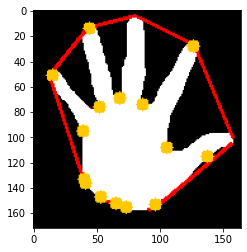

In [61]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hul = cv2.convexHull(contours[0])
hull = cv2.convexHull(contours[0],returnPoints=False)
defects = cv2.convexityDefects(contours[0],hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(contours[0][s][0])
    end = tuple(contours[0][e][0])
    far = tuple(contours[0][f][0])
    cv2.line(hand,start,end,(0,0,255),2)
    cv2.circle(hand,far,5,(0,200,255),-1)

print("ÊòØÂê¶‰∏∫Âá∏Â§öËæπÂΩ¢Ôºö",cv2.isContourConvex(hul))  # Âà§Êñ≠ÊòØÂê¶‰∏∫Âá∏ÂΩ¢ÁöÑ
img_show(hand)

In [62]:
# 2.ÁÇπÂà∞ËΩÆÂªìÁöÑË∑ùÁ¶ª
# Âú®opencv‰∏≠Áî®ÂáΩÊï∞cv2.pointPolygonTest()Êù•ËÆ°ÁÆóÁÇπÂà∞Â§öËæπÂΩ¢ÔºàËΩÆÂªìÔºâÁöÑÊúÄÁü≠Ë∑ùÁ¶ªÔºà‰πüÊòØÂûÇÁõ¥Ë∑ùÁ¶ªÔºâÔºö

# retval = cv2.pointPolygonTest(contour,pt,measureDist)
# contourÔºöËΩÆÂªì
# ptÔºöÁÇπ
# neasureDistÔºöÂ∏ÉÂ∞îÂÄºÔºåË°®Á§∫Ë∑ùÁ¶ªÁöÑÂà§Êñ≠ÊñπÂºè„ÄÇ
# ÂΩìÂÄº‰∏∫TureÔºöËÆ°ÁÆóÁÇπÂà∞ËΩÆÂªìÁöÑË∑ùÁ¶ªÔºåËã•ÁÇπÂú®ËΩÆÂªìÂ§ñÈÉ®ÔºåËøîÂõûË¥üÊï∞ÔºõËã•ÁÇπÂú®ËΩÆÂªì‰∏äÔºåËøîÂõû0ÔºõËã•ÁÇπÂú®ËΩÆÂªìÂÜÖÈÉ®ÔºåËøîÂõûÊ≠£Êï∞
# ÂΩìÂÄº‰∏∫FalseÔºö‰∏çËÆ°ÁÆóË∑ùÁ¶ªÔºåÂè™ËøîÂõû-1Ôºå0Ôºå1‰∏≠ÁöÑ‰∏Ä‰∏™ÂÄºÔºåË°®Á§∫ÁÇπÁõ∏ÂØπ‰∫éËΩÆÂªìÁöÑ‰ΩçÁΩÆÂÖ≥Á≥ª

distA: 44.92307692307693
distB: -16.97056274847714
distC: -0.0


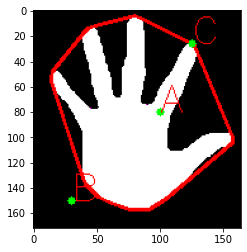

In [63]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")

# Ëé∑ÂèñËΩÆÂªì
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# Ëé∑ÂèñÂá∏ÂåÖ
hull = cv2.convexHull(contours[0])
hand = cv2.cvtColor(hand,cv2.COLOR_BGR2RGB)
cv2.polylines(hand,[hull],1,(0,0,255),2)

# ÂÜÖÈÉ®ÁÇπAÂà∞ËΩÆÂªìË∑ùÁ¶ª
distA = cv2.pointPolygonTest(hull,(100,80),True)
cv2.circle(hand,(100,80),3,(0,255,0),-1)
cv2.putText(hand,"A",(100,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

# Â§ñÈÉ®ÁÇπBÂà∞ËΩÆÂªìË∑ùÁ¶ª
distB = cv2.pointPolygonTest(hull,(30,150),True)
cv2.circle(hand,(30,150),3,(0,255,0),-1)
cv2.putText(hand,"B",(30,150),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

# ËΩÆÂªì‰∏äÁÇπCÂà∞ËΩÆÂªìË∑ùÁ¶ª
distC = cv2.pointPolygonTest(hull,(125,26),True)
cv2.circle(hand,(125,26),3,(0,255,0),-1)
cv2.putText(hand,"C",(125,26),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

print("distA:",distA)
print("distB:",distB)
print("distC:",distC)
img_show(hand)

# 12.6 Âà©Áî®ÂΩ¢Áä∂Âú∫ÊôØÁÆóÊ≥ïÊØîËæÉËΩÆÂªì

In [64]:
# Áî®Áü©ÂΩ¢Ë°®ÂΩ¢Áä∂ÊòØ‰∏ÄÁßçÈùûÂ∏∏ÊúâÊïàÁöÑÊñπÊ≥ïÔºå‰ΩÜÁé∞Âú®Êúâ‰∫ÜÊõ¥ÊúâÊïàÁöÑÊñπÊ≥ï„ÄÇ
# ‰ªéopencv3ÂºÄÂßãÔºåÊúâ‰∫Ü‰∏ìÊúâÊ®°ÂùóshapeÔºåËØ•Ê®°Âùó‰∏≠ÁöÑÂΩ¢Áä∂Âú∫ÊôØÁÆóÊ≥ïËÉΩÂ§üÊõ¥È´òÊïàÂú∞ÊØîËæÉÂΩ¢Áä∂

### 12.6.1 ËÆ°ÁÆóÂΩ¢Áä∂Âú∫ÊôØË∑ùÁ¶ª

In [65]:
# opencvÊèê‰æõ‰∫Ü‰ΩøÁî®‚ÄúË∑ùÁ¶ª‚Äù‰Ωú‰∏∫ÂΩ¢Áä∂ÊØîËæÉÁöÑÂ∫¶ÈáèÊ†áÂáÜ„ÄÇËøôÊòØÂõ†‰∏∫ÂΩ¢Áä∂‰πãÈó¥ÁöÑÂ∑ÆÂºÇÂÄº‰∏éË∑ùÁ¶ªÊúâÁõ∏‰ºº‰πãÂ§Ñ
# opencvÊèê‰æõ‰∫ÜÂáΩÊï∞cv2.createShapeContextDistanceExtractor()Áî®‰∫éËÆ°ÁÆóÂΩ¢Áä∂Âú∫ÊôØË∑ùÁ¶ª
# ÂÖ∂‰ΩøÁî®ÁöÑ‚ÄúÂΩ¢Áä∂‰∏ä‰∏ãÊñáÁÆóÊ≥ï‚ÄùÂú®ËÆ°ÁÆóË∑ùÁ¶ªÊó∂ÔºåÂú®ÊØè‰∏™ÁÇπ‰∏äÈôÑÂä†‰∏Ä‰∏™‚ÄúÂΩ¢Áä∂‰∏ä‰∏ãÊñá‚ÄùÊèèËø∞Á¨¶ÔºåËÆ©ÊØè‰∏™ÁÇπÈÉΩËÉΩÊçïËé∑Ââ©‰ΩôÁÇπÁõ∏ÂØπ‰∫éÂÆÉÁöÑÂàÜÂ∏ÉÁâπÂæÅÔºå‰ªéËÄåÊèê‰æõÂÖ®Â±ÄÈâ¥Âà´ÁâπÂæÅ

# retval = cv2.createShapeContextDistanceExtractor([,nAngularBins[,nRadialBins[,innerRadius[,outerRadius[,iterations[,comparer[,transformer]]]]]]])
# retvalÔºöËøîÂõûÁªìÊûúÔºåËØ•ÁªìÊûúÂèØ‰ª•ÈÄöËøáÂáΩÊï∞cv2.ShapeDistanceExtractor.computeDistance()ËÆ°ÁÆóÊùéÈùíÂì•‰∏çÂêåÂΩ¢Áä∂‰πãÈó¥ÁöÑË∑ùÁ¶ªÔºö
# distance = cv2.ShapeDistanceExtractor.computeDistance(contour1,contour2)  # Âºè‰∏≠contour1Âíåcontour2ÊòØ‰∏çÂêåÁöÑËΩÆÂªì
# nAngularBinsÔºö‰∏∫ÂΩ¢Áä∂ÂåπÈÖç‰∏≠‰ΩøÁî®ÁöÑÂΩ¢Áä∂‰∏ä‰∏ãÈóÆÊñáÊèèËø∞Á¨¶Âª∫Á´ãÁöÑËßíÂÆπÂô®ÁöÑÊï∞Èáè
# nRadialBinsÔºö‰∏∫ÂΩ¢Áä∂ÂåπÈÖç‰∏≠‰ΩøÁî®ÁöÑÂΩ¢Áä∂‰∏ä‰∏ãÈóÆÊñáÊèèËø∞Á¨¶Âª∫Á´ãÁöÑÂæÑÂêëÂÆπÂô®ÁöÑÊï∞Èáè
# innerRadiusÔºöÂΩ¢Áä∂‰∏ä‰∏ãÊñáÊèèËø∞Á¨¶ÁöÑÂÜÖÂçäÂæÑ
# outerRadiusÔºöÂΩ¢Áä∂‰∏ä‰∏ãÊñáÊèèËø∞Á¨¶ÁöÑÂ§ñÂçäÂæÑ
# iterationsÔºöËø≠‰ª£Ê¨°Êï∞
# comparerÔºöÁõ¥ÊñπÂõæ‰ª£‰ª∑ÊèêÂèñÁÆóÂ≠ê„ÄÇËØ•ÂáΩÊï∞‰ΩøÁî®‰∫ÜÁõ¥ÊñπÂõæ‰ª£‰ª∑ÊèêÂèñ‰ªøÂáΩÊï∞ÔºåÂèØ‰ª•Áõ¥Êé•ÈááÁî®Áõ¥ÊñπÂõæ‰ª£‰ª∑ÊèêÂèñ‰ªøÂáΩÊï∞ÁöÑÁÆóÂ≠ê‰Ωú‰∏∫ÂèÇÊï∞
# transformerÔºöÂΩ¢Áä∂ÂèòÊç¢ÂèÇÊï∞

0.0008787415572442114
1.6731972694396973
1236.7515869140625


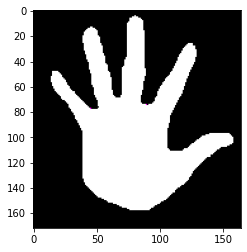

In [72]:
# ÊâãÂõæÂÉèËΩÆÂªì
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]

# ÊâãÂõæÂÉèËΩÆÂªìÔºàÁº©ÊîæÁøªËΩ¨Ôºâ
hand2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
h,w = hand2.shape[:2]
size = (int(h*0.9),int(w*0.7))
hand2 = cv2.resize(hand2,size)
hand2 = cv2.flip(hand2,-1)
gray = cv2.cvtColor(hand2,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours[0]

# cvÂõæÂÉèËΩÆÂªì
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt3 = contours[2]

# ÊûÑÈÄ†Ë∑ùÁ¶ªÊèêÂèñÁÆóÂ≠ê
sd = cv2.createShapeContextDistanceExtractor()  # ÈúÄÊåâË£Öopencv-contribÊâ©Â±ï

# ËÆ°ÁÆóË∑ùÁ¶ª
distance1 = sd.computeDistance(cnt1,cnt1)
distance2 = sd.computeDistance(cnt1,cnt2)
distance3 = sd.computeDistance(cnt1,cnt3)

print(distance1)
print(distance2)
print(distance3)
img_show(hand)

# Áõ∏ÂêåÂõæÁâá‰πãÈó¥ÁöÑÂΩ¢Áä∂Âú∫ÊôØË∑ùÁ¶ª‰∏∫0
# Áõ∏‰ººÂõæÁâá‰πãÈó¥ÁöÑÂΩ¢Áä∂Âú∫ÊôØË∑ùÁ¶ªËæÉÂ∞è
# ‰∏çÂêåÂõæÁâá‰πãÈó¥ÁöÑÂΩ¢Áä∂Âú∫ÊôØË∑ùÁ¶ªËæÉÂ§ß

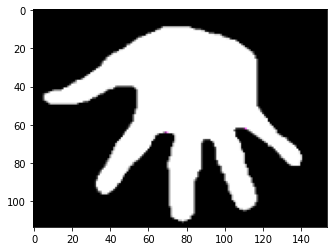

In [73]:
img_show(hand2)

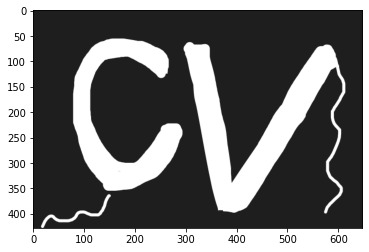

In [74]:
img_show(cv)

### 12.6.2 ËÆ°ÁÆó Huasdoff Ë∑ùÁ¶ª

In [75]:
# HausdoffË∑ùÁ¶ªÁöÑËÆ°ÁÆóÊñπÊ≥ïÔºö
# 1ÔºâÈíàÂØπÂõæÂÉèAÂÜÖÁöÑÊØè‰∏Ä‰∏™ÁÇπÔºåÂØªÊâæÂÖ∂Ë∑ùÁ¶ªÂõæÂÉèBÁöÑÊúÄÁü≠Ë∑ùÁ¶ªÔºåÂ∞ÜËøô‰∏™ÊúÄÁü≠Ë∑ùÁ¶ª‰Ωú‰∏∫HausdorffÁõ¥Êé•Ë∑ùÁ¶ªD1
# 2ÔºâÈíàÂØπÂõæÂÉèBÂÜÖÁöÑÊØè‰∏Ä‰∏™ÁÇπÔºåÂØªÊâæÂÖ∂Ë∑ùÁ¶ªÂõæÂÉèAÁöÑÊúÄÁü≠Ë∑ùÁ¶ªÔºåÂ∞ÜËøô‰∏™ÊúÄÁü≠Ë∑ùÁ¶ª‰Ωú‰∏∫HausdorffÁõ¥Êé•Ë∑ùÁ¶ªD2
# 3ÔºâÂ∞ÜD1ÔºåD2‰∏≠ËæÉÂ§ßËÄÖ‰Ωú‰∏∫HausdorffË∑ùÁ¶ª
# ÂÖ¨ÂºèË°®Á§∫Ôºö
# H(A,B) = max(h(A,B),h(B,A))
# h(A,B) = maxmin||a-b||  # a‚àäA,b‚àäB,||.||Ë°®Á§∫aÂíåbÁöÑÊüêÁßçËåÉÊï∞ÔºåÈÄöÂ∏∏ÊòØÊ¨ßÂºèË∑ùÁ¶ª

# opencvÊèê‰æõÂáΩÊï∞cv2.createHausdorffDistanceExtractor()Êù•ËÆ°ÁÆóHausdorffË∑ùÁ¶ªÔºö
# retval = cv2.createHausdorffDistanceExtractor([,distanceFlag[,rankProp]])
# retvalÔºö
# distanceÔºöË∑ùÁ¶ªÊ†áËÆ∞ÔºåÂèØÈÄâ
# rankPropÔºöÊØî‰æãÂÄºÔºå0-1‰πãÈó¥ÔºåÂèØÈÄâ

In [77]:
# ËÆ°ÁÆó‰∏çÂêåÂõæÂÉèÁöÑHausdoffË∑ùÁ¶ª
# ÊâãÂõæÂÉèËΩÆÂªì
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]

# ÊâãÂõæÂÉèËΩÆÂªìÔºàÁº©ÊîæÁøªËΩ¨Ôºâ
hand2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
h,w = hand2.shape[:2]
size = (int(h*0.9),int(w*0.7))
hand2 = cv2.resize(hand2,size)
hand2 = cv2.flip(hand2,-1)
gray = cv2.cvtColor(hand2,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours[0]

# cvÂõæÂÉèËΩÆÂªì
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt3 = contours[2]

# ÊûÑÈÄ†Ë∑ùÁ¶ªÊèêÂèñÁÆóÂ≠ê
hd = cv2.createShapeContextDistanceExtractor()

# ËÆ°ÁÆóË∑ùÁ¶ª
d1 = hd.computeDistance(cnt1,cnt1)
d2 = hd.computeDistance(cnt1,cnt2)
d3 = hd.computeDistance(cnt1,cnt3)

print(distance1)
print(distance2)
print(distance3)

# Áõ∏ÂêåÂõæÁâá‰πãÈó¥ÁöÑHausdorffË∑ùÁ¶ª‰∏∫0
# Áõ∏‰ººÂõæÁâá‰πãÈó¥ÁöÑHausdorffË∑ùÁ¶ªËæÉÂ∞è
# ‰∏çÂêåÂõæÁâá‰πãÈó¥ÁöÑHausdorffË∑ùÁ¶ªËæÉÂ§ß

0.0008787415572442114
1.6731972694396973
1236.7515869140625


# 12.7 ËΩÆÂªìÁöÑÁâπÂæÅÂÄº

### 12.7.1 ÂÆΩÈ´òÊØî

0.7190635451505016


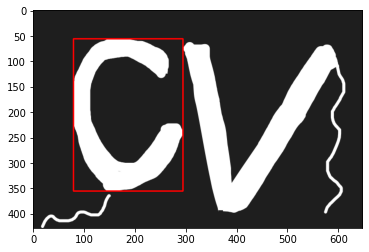

In [79]:
# ÂèØ‰ª•‰ΩøÁî®ÂÆΩÈ´òÊØîÊù•ÊèèËø∞ËΩÆÂªì
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),2)
aspectRatio = float(w)/h

print(aspectRatio)
img_show(cv)

### 12.7.2 Extent

0.37654196157735087


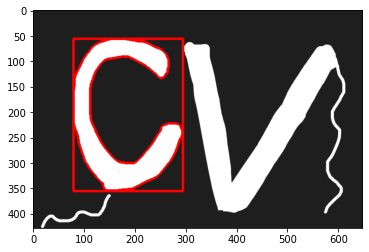

In [94]:
# ÂèØ‰ª•‰ΩøÁî®ËΩÆÂªìÈù¢ÁßØ‰∏éÁü©ÂΩ¢ËæπÁïåÔºàÁü©ÂΩ¢ÂåÖÂõ¥Ê°ÜÔºåÁü©ÂΩ¢ËΩÆÂªìÔºâÈù¢ÁßØ‰πãÊØîExtentÊù•ÊèèËø∞ÂõæÂÉèÂèäÂÖ∂ËΩÆÂªìÁâπÂæÅ
# Extent = ËΩÆÂªìÈù¢ÁßØ/Áü©ÂΩ¢ËæπÁïåÈù¢ÁßØ
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),3)
cntArea = cv2.contourArea(cnt)
rectArea = w*h
extent = float(cntArea)/rectArea

print(extent)
img_show(cv)

### 12.7.3 Solidity

0.4749440803673037


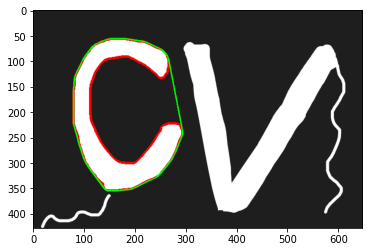

In [93]:
# ÂèØ‰ª•‰ΩøÁî®ËΩÆÂªìÈù¢ÁßØ‰∏éÂá∏ÂåÖÈù¢ÁßØ‰πãÊØîSolidityÊù•Ë°°ÈáèÂõæÂÉèÔºåËΩÆÂªìÂèäÂá∏ÂåÖÁöÑÁâπÂæÅÔºö
# Solidity = ËΩÆÂªìÈù¢ÁßØ/Âá∏ÂåÖÈù¢ÁßØ
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cntArea = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hullArea = cv2.contourArea(hull)
cv2.polylines(cv,[hull],True,(0,255,0),2)
solidity = float(cntArea)/hullArea

print(solidity)
img_show(cv)

### 12.7.4 Á≠âÊïàÁõ¥ÂæÑ

175.55636251602888


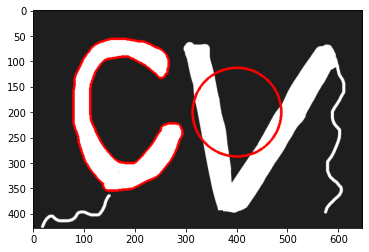

In [92]:
# ÂèØ‰ª•Áî®Á≠âÊïàÁõ¥Êé•Ë°°ÈáèËΩÆÂªìÁöÑÁâπÂæÅÂÄºÔºåËØ•ÂÄºÊòØ‰∏éËΩÆÂªìÈù¢ÁßØÁõ∏Á≠âÁöÑÂúÜÂΩ¢ÁöÑÁõ¥ÂæÑÔºö
# Á≠âÊïàÁõ¥ÂæÑ = ‚àö(4*ËΩÆÂªìÈù¢ÁßØ/ùúãÔºâ
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cntArea = cv2.contourArea(cnt)
equipDiameter = np.sqrt(4*cntArea/np.pi)
cv2.circle(cv,(400,200),int(equipDiameter/2),(0,0,255),3)

print(equipDiameter)
img_show(cv)

### 12.7.5 ÊñπÂêë

ellipse: ((183.6658172607422, 200.66261291503906), (201.35049438476562, 285.8033752441406), 174.46080017089844)


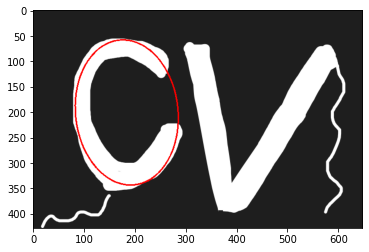

In [88]:
# opencvÊèê‰æõÁöÑcv2.fitEllipse()ÂèØ‰ª•Áî®Êù•ÊûÑÈÄ†ÊúÄ‰ºòÊãüÂêàÊ§≠ÂúÜÔºåËøòÂèØ‰ª•Âú®ËøîÂõûÂÄºÂÜÖÂàÜÂà´ËøîÂõûÊ§≠ÂúÜÁöÑ‰∏≠ÂøÉÁÇπÔºåËΩ¥ÈïøÔºåÊóãËΩ¨ËßíÂ∫¶Á≠â‰ø°ÊÅØ
# ‰ΩøÁî®ËøôÁßçÂΩ¢ÂºèÔºåËÉΩÂ§üÊõ¥Áõ¥ËßÇÂú∞Ëé∑ÂèñÊ§≠ÂúÜÁöÑÊñπÂêëÁ≠â‰ø°ÊÅØ
# (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
# (x,y)ÔºöÊ§≠ÂúÜ‰∏≠ÂøÉÁÇπ
# (MA,ma)ÔºöÊ§≠ÂúÜÊ∞¥Âπ≥ÊñπÂêëËΩ¥ÂíåÂûÇÁõ¥ÊñπÂêëËΩ¥ÈïøÂ∫¶
# angleÔºöÊ§≠ÂúÜÊóãËΩ¨ËßíÂ∫¶

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

ellipse = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
cv2.ellipse(cv,ellipse,(0,0,255),2)

print("ellipse:",ellipse)
img_show(cv)

### 12.7.6 Êé©Ê®°ÂíåÂÉèÁ¥†ÁÇπ

In [89]:
# ÊúâÊó∂Êàë‰ª¨Â∏åÊúõËé∑ÂèñÊüê‰∏™ÂØπË±°ÁöÑÊé©Ê®°ÂõæÂÉèÂèäÂÖ∂ÂØπÂ∫îÁöÑÁÇπ
# cv2.drawContours()ÁöÑËΩÆÂªìÂÆΩÂ∫¶ÂèÇÊï∞thicknessËÆæÁΩÆ‰∏∫-1ÔºåÂç≥ÂèØËé∑ÂèñÁâπÂÆöÂØπË±°ÁöÑÂÆûÂøÉËΩÆÂªìÔºåÂç≥ÁâπÂÆöÂØπË±°ÁöÑÊé©Ê®°
# Âè¶Â§ñÊàë‰ª¨ËøòÂ∏åÊúõËé∑ÂèñËΩÆÂªìÔºàÂÆûÂøÉ„ÄÅÁ©∫ÂøÉÔºâÂÉèÁ¥†ÁÇπÁöÑÂÖ∑‰Ωì‰ΩçÁΩÆ‰ø°ÊÅØ
# ‰∏ÄÂçäËΩÆÂªìÂÜÖÁöÑÂÉèÁ¥†ÁÇπÊòØÈùû0ÂÉèÁ¥†ÁÇπÔºå‰∏§ÁßçÊñπÂºèËé∑ÂèñÔºö1.NumpyÊï∞ÁªÑÔºõ2.opencvÂáΩÊï∞

In [91]:
# 1.‰ΩøÁî®NumpyÂáΩÊï∞Ëé∑ÂèñËΩÆÂªìÂÉèÁ¥†ÁÇπ
# numpy.nonzero()ÂáΩÊï∞ÊâæÂá∫Êï∞ÁªÑÂÜÖÈùû0ÂÖÉÁ¥†‰ΩçÁΩÆÔºå‰ΩÜÊòØÂÖ∂ËøîÂõûÂÄºÊòØÂ∞ÜË°å„ÄÅÂàóÂàÜÂà´ÊòæÁ§∫ÁöÑ
a = [[0,0,0,1,0],
    [0,0,1,0,1],
    [0,0,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,1]]

# ËøîÂõûaÂÜÖÈùû0ÂÖÉÁ¥†‰ΩçÁΩÆÔºö
nonzero = np.nonzero(a)

# ‰ΩøÁî®numpy.transpose()ÂáΩÊï∞Â§ÑÁêÜ‰∏äËø∞ÂÄºÔºåÂæóÂà∞Ëøô‰∫õÁÇπÔºàx,yÔºâÂΩ¢ÂºèÁöÑÂùêÊ†á
transpose = np.transpose(nonzero)

print("nonzero:\n",nonzero)
print("transpose:\n",transpose)

nonzero:
 (array([0, 1, 1, 2, 2, 2, 3, 4, 4]), array([3, 2, 4, 2, 3, 4, 0, 0, 4]))
transpose:
 [[0 3]
 [1 2]
 [1 4]
 [2 2]
 [2 3]
 [2 4]
 [3 0]
 [4 0]
 [4 4]]


[[ 56 152]
 [ 56 153]
 [ 56 154]
 ...
 [354 165]
 [354 166]
 [354 167]]


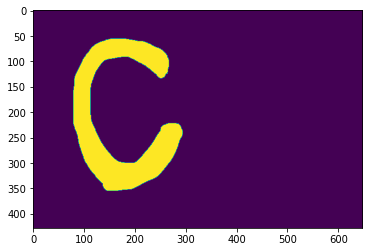

In [98]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))

print(pixelpoints)
img_show(mask)

[[[152  56]]

 [[153  56]]

 [[154  56]]

 ...

 [[165 354]]

 [[166 354]]

 [[167 354]]]


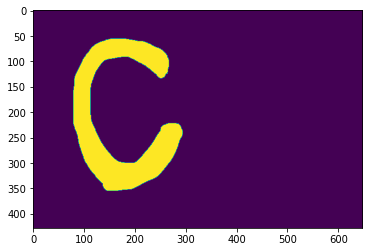

In [100]:
# 2.‰ΩøÁî®opencvÂáΩÊï∞Ëé∑ÂèñËΩÆÂªìÁÇπ
# opencvÊèê‰æõ‰∫ÜÂáΩÊï∞cv2.findNonZero()Áî®‰∫éÊü•ÊâæÈùûÈõ∂ÂÖÉÁ¥†ÁöÑÁ¥¢ÂºïÔºö
# idx = cv2.findNonZero(src)
# idxÔºöÈùûÈõ∂ÂÖÉÁ¥†Á¥¢Âºï‰ΩçÁΩÆÔºåÔºàÂàóÔºåË°åÔºâ
# srcÔºöË¶ÅÊü•ÊâæÁöÑÂõæÁâá

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
idx = cv2.findNonZero(mask)

print(idx)
img_show(mask)

### 12.7.7 ÊúÄÂ§ßÂÄºÂíåÊúÄÂ∞èÂÄºÂèäÂÆÉ‰ª¨ÁöÑ‰ΩçÁΩÆ

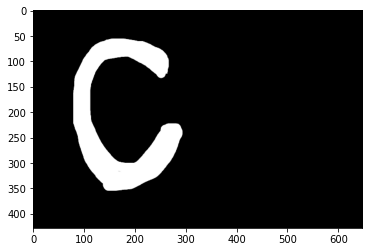

In [102]:
# opencvÊèê‰æõ‰∫ÜÂáΩÊï∞cv2.minMaxLoc()Áî®‰∫éÂú®ÊåáÂÆöÂØπË±°ÂÜÖÊü•ÊâæÊúÄÂ§ßÂÄºÔºåÊúÄÂ∞èÂÄºÔºåÂèäÂÖ∂‰ΩçÁΩÆÔºö
# minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(imgray,mask=mask)
# ËøîÂõûÂÄºÂàÜÂà´ÊòØÔºö
# ÊúÄÂ∞èÂÄºÔºåÊúÄÂ§ßÂÄºÔºåÊúÄÂ∞èÂÄº‰ΩçÁΩÆÔºåÊúÄÂ§ßÂÄº‰ΩçÁΩÆ
# ÂèÇÊï∞Ôºö
# imgrayÔºöÂ§ßÈÄöÈÅìÂõæÂÉè
# maskÔºöÊé©Ê®°„ÄÇÈÄöËøá‰ΩøÁî®Êé©Ê®°ÂõæÂÉèÔºåÂèØ‰ª•ÂæóÂà∞Êé©Ê®°ÊåáÂÆöÂå∫ÂüüÂÜÖÁöÑÊúÄÂÄº‰ø°ÊÅØ

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

# Âà©Áî®Êé©Ê®°Ëé∑ÂèñÊÑüÂÖ¥Ë∂£Âå∫ÂüüÁöÑÊúÄÂÄº
mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],-1,255,-1)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(gray,mask=mask)

# ‰ΩøÁî®Êé©Ê®°Ëé∑ÂèñÊÑüÂÖ¥Ë∂£Âå∫ÂüüÂπ∂ÊòæÁ§∫
maskCv = np.zeros(cv.shape,np.uint8)
cv2.drawContours(maskCv,[cnt],-1,(255,255,255),-1)
loc = cv2.bitwise_and(cv,maskCv)
img_show(loc)

### 12.7.8 Âπ≥ÂùáÈ¢úËâ≤ÂèäÂπ≥ÂùáÁÅ∞Â∫¶

meanVal: (252.52199886978283, 252.52199886978283, 252.52199886978283, 0.0)


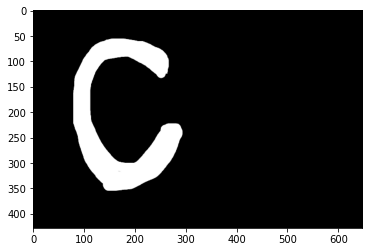

In [104]:
# opencvÊèê‰æõ‰∫ÜÂáΩÊï∞cv2.mean()Áî®‰∫éËÆ°ÁÆó‰∏Ä‰∏™ÂØπË±°ÁöÑÂπ≥ÂùáÈ¢úËâ≤ÊàñÂπ≥ÂùáÁÅ∞Â∫¶Ôºö
# meanVal = cv2.mean(im,mask=mask)
# meanValÔºöËøîÂõûÁöÑÂπ≥ÂùáÂÄº
# imÔºöÂéüÂßãÂõæÂÉè
# maskÔºöÊé©Ê®°„ÄÇÊûÑÈÄ†mean‰ΩøÁî®ÁöÑÊé©Ê®°ÂøÖÈ°ªÊòØÂçïÈÄöÈÅìÁöÑ

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,(255,255,255),-1)
meanVal = cv2.mean(cv,mask=mask)  # maskÊòØ‰∏Ä‰∏™Âå∫ÂüüÔºåÊâÄ‰ª•ÂøÖÈ°ªÊòØÂçïÈÄöÈÅìÁöÑ
print("meanVal:",meanVal)

# ‰ΩøÁî®Êé©Ê®°Ëé∑ÂèñÊÑüÂÖ¥Ë∂£Âå∫ÂüüÂπ∂ÊòæÁ§∫
maskCv = np.zeros(cv.shape,np.uint8)
cv2.drawContours(maskCv,[cnt],-1,(255,255,255),-1)
loc = cv2.bitwise_and(cv,maskCv)
img_show(loc)

### 12.7.9 ÊûÅÁÇπ

leftmost: (79, 157)
rightmost: (293, 244)
topmost: (152, 56)
bottommost: (145, 354)


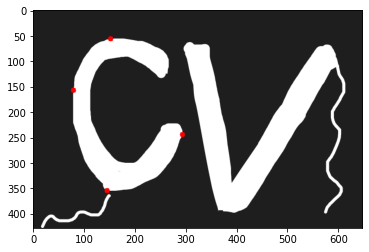

In [110]:
# ÊúâÊó∂Êàë‰ª¨Â∏åÊúõËé∑ÂèñÊüê‰∏™ÂØπË±°ÂÜÖÁöÑÊûÅÂÄºÁÇπÔºå‰æãÂ¶ÇÊúÄÂ∑¶Á´ØÔºåÊúÄÂè≥Á´ØÔºåÊúÄ‰∏äÁ´ØÔºåÊúÄ‰∏ãÁ´ØÂõõ‰∏™ÁÇπ
# opencvÊèê‰æõ‰∫ÜÁõ∏Â∫îÂáΩÊï∞Êù•Ëé∑ÂèñËøô‰∫õÁÇπ
# leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
# rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
# topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
# bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(cv,leftmost,5,(0,0,255),-1)
cv2.circle(cv,rightmost,5,(0,0,255),-1)
cv2.circle(cv,topmost,5,(0,0,255),-1)
cv2.circle(cv,bottommost,5,(0,0,255),-1)

print("leftmost:",leftmost)
print("rightmost:",rightmost)
print("topmost:",topmost)
print("bottommost:",bottommost)
img_show(cv)